<a href="https://colab.research.google.com/github/VM-Janani/Heart_disease_risk_-prediction/blob/main/Source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas numpy xgboost scikit-learn shap matplotlib seaborn

In [3]:
pip install imbalanced-learn xgboost scikit-learn

In [4]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [6]:
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/project/framingham.csv")
# Display first few rows
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# Drop the 'education' column
data.drop(columns=['education'], inplace=True)
data.drop(columns=['prevalentStroke'], inplace=True)

# Display the first few rows to confirm
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
# Check for missing values
data.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0
diaBP,0


In [10]:
# Handle missing values (fill with median or drop rows based on your preference)
data.fillna(data.median(), inplace=True)

In [11]:
# Check for missing values
data.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0


In [12]:
# Define features and target
X = data.drop(columns=["TenYearCHD"])  # Assuming 'TenYearCHD' is the target column
y = data["TenYearCHD"]

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Feature Selection using ANOVA F-test
_, p_values = f_classif(X_scaled, y)
selected_features = X.columns[p_values < 0.05]  # Only features with p-value < 0.05 are selected
X_selected = X[selected_features]

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=42)

In [19]:
X_train.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
4860,1,50,28.886237,0.0,0,0,288.924158,147.962079,82.554495,27.732564,72.075842
334,1,39,20.000000,0.0,1,0,220.000000,145.000000,99.000000,26.500000,90.000000
3936,1,62,0.000000,0.0,1,0,208.000000,144.000000,80.000000,31.420000,66.000000
4743,0,55,0.000000,0.0,0,0,276.500566,115.083365,78.166730,28.377446,79.666918
1586,0,55,20.000000,0.0,0,0,246.000000,139.000000,90.000000,29.000000,100.000000


In [17]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_selected, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

Class distribution after SMOTE:
TenYearCHD
0    3596
1    3596
Name: count, dtype: int64


In [20]:
# Define the model
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define Optuna objective function for hyperparameter tuning
def objective(trial):
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-5, 1e1),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "lambda": trial.suggest_loguniform("lambda", 1e-5, 1e2),
        "alpha": trial.suggest_loguniform("alpha", 1e-5, 1e2),
        "scale_pos_weight": (len(y_res) - y_res.sum()) / y_res.sum()
    }
    model.set_params(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

# Hyperparameter tuning with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters found: ", best_params)

# Train the model with best parameters
model.set_params(**best_params)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

# Set a custom threshold
custom_threshold = 0.35
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Accuracy and classification report
print("Accuracy (Custom Threshold):", accuracy_score(y_test, y_pred_custom))
print("Classification Report (Custom Threshold):\n", classification_report(y_test, y_pred_custom))

# Confusion matrix
print("Confusion Matrix (Custom Threshold):\n", confusion_matrix(y_test, y_pred_custom))

# Cross-validation accuracy
cv_score = cross_val_score(model, X_res, y_res, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", cv_score.mean())

[I 2025-05-26 06:05:54,673] A new study created in memory with name: no-name-06ce652f-f59f-4cb0-9194-fe1cb4faabdf
<ipython-input-20-af1549ee3765>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
<ipython-input-20-af1549ee3765>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-20-af1549ee3765>:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 

Best hyperparameters found:  {'max_depth': 10, 'learning_rate': 0.06363387466313307, 'n_estimators': 310, 'subsample': 0.6222763410897091, 'colsample_bytree': 0.7331372858753212, 'gamma': 5.990947497898554e-05, 'min_child_weight': 1, 'lambda': 0.6629547779676295, 'alpha': 0.44691164725167604}
Accuracy (Custom Threshold): 0.8708333333333333
Classification Report (Custom Threshold):
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       370
           1       0.82      0.94      0.88       350

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720

Confusion Matrix (Custom Threshold):
 [[299  71]
 [ 22 328]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracy: 0.8702917243758946


In [ ]:
risk_percentage = y_proba * 100

In [ ]:
import pandas as pd

# Create a DataFrame to compare
risk_df = pd.DataFrame({
    'Predicted Risk (%)': risk_percentage,
    'Actual Label': y_test.values
})

# Add predicted label based on threshold (e.g., 0.35)
threshold = 0.35
risk_df['Predicted Label'] = (risk_df['Predicted Risk (%)'] / 100 >= threshold).astype(int)

# Optionally, round risk % to 2 decimal places
risk_df['Predicted Risk (%)'] = risk_df['Predicted Risk (%)'].round(2)

# Display top results
print(risk_df.head(11))


    Predicted Risk (%)  Actual Label  Predicted Label
0            12.430000             0                0
1             6.970000             0                0
2            99.389999             1                1
3            99.540001             1                1
4            22.100000             0                0
5            98.400002             1                1
6            92.389999             1                1
7            14.130000             0                0
8             0.530000             0                0
9            99.110001             1                1
10            2.060000             0                0


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test is the actual labels and y_proba is the predicted probability of class 1
mse = mean_squared_error(y_test, y_proba)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_proba)

# For MAPE, we avoid division by zero
epsilon = 1e-10  # To avoid division by zero
mape = np.mean(np.abs((y_test - y_proba) / (y_test + epsilon))) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 0.0717
Root Mean Squared Error (RMSE): 0.2678
Mean Absolute Error (MAE): 0.1532


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve,log_loss
import matplotlib.pyplot as plt
import seaborn as sns
# Accuracy
accuracy = accuracy_score(y_test, y_pred_custom)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

# AUC
auc = roc_auc_score(y_test,risk_percentage)

# Classification report
report = classification_report(y_test, y_pred_custom)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

Accuracy: 0.89
Precision: 0.86
Recall: 0.93
F1 Score: 0.89
AUC-ROC: 0.96


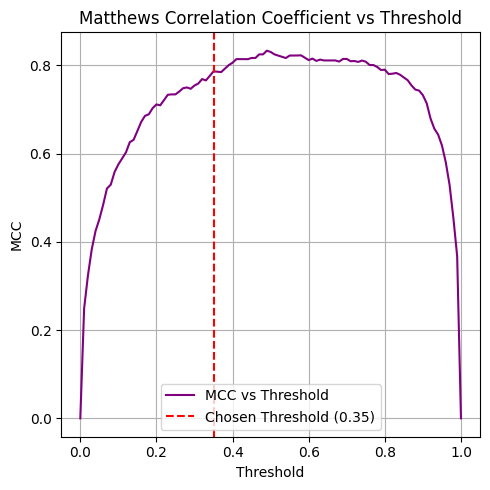

In [ ]:
import numpy as np
from sklearn.metrics import matthews_corrcoef

thresholds = np.arange(0.0, 1.01, 0.01)
mcc_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    mcc = matthews_corrcoef(y_test, y_pred_thresh)
    mcc_scores.append(mcc)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(thresholds, mcc_scores, label='MCC vs Threshold', color='purple')
plt.axvline(x=0.35, color='red', linestyle='--', label='Chosen Threshold (0.35)')
plt.xlabel('Threshold')
plt.ylabel('MCC')
plt.title('Matthews Correlation Coefficient vs Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


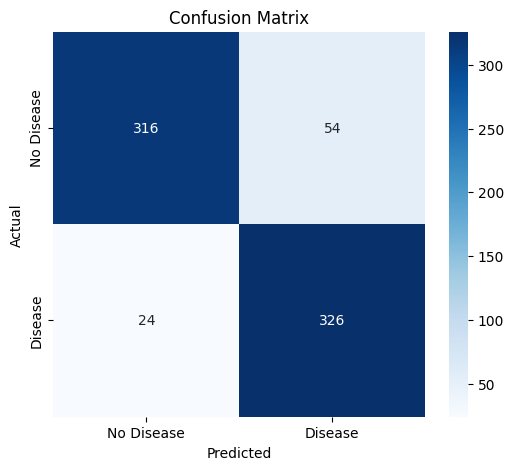

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

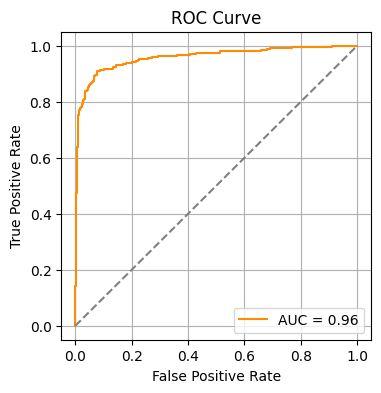

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,risk_percentage )

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


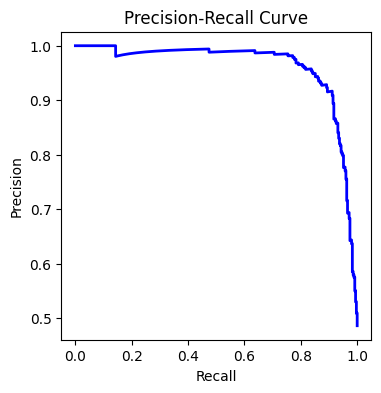

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test,risk_percentage )

# Plot Precision-Recall curve
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


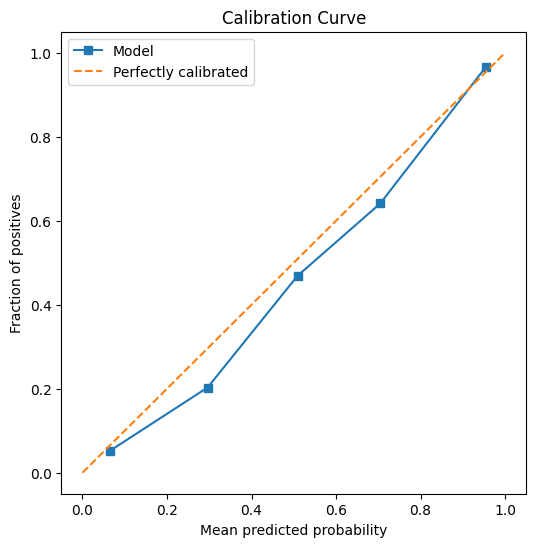

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_proba, n_bins=5)

# Plot calibration curve
plt.figure(figsize=(6,6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pickle

# Let's say your trained model is stored in the variable `model`
with open("heart_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files
files.download("heart_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(X_train, "X_train.pkl")


['X_train.pkl']

In [ ]:
joblib.dump(X_train, "X_train.pkl")
from google.colab import files
files.download("X_train.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train = joblib.load("X_train.pkl")

In [ ]:
!pip install shap


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving heart_model (1).pkl to heart_model (1).pkl


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving X_train.pkl to X_train.pkl


In [ ]:
import shap
import xgboost as xgb
import pandas as pd
import joblib  # or pickle if you used that


In [ ]:
# Load model
xgb_model = joblib.load("heart_model (1).pkl")  # Or your file name

# Load training data
X_train =  joblib.load("X_train.pkl")


In [ ]:
explainer = shap.Explainer(xgb_model, X_train)


In [ ]:
X_test.to_csv("X_test.csv", index=False)


In [ ]:
X_test = pd.read_csv("X_test.csv")


In [ ]:
shap_values = explainer(X_test)


100%|===================| 717/720 [00:26<00:00]       

In [ ]:
# For example, check first sample in test set
sample_index = 0
sample = X_test.iloc[sample_index]

# Get SHAP values for that sample
sample_shap_values = shap_values[sample_index].values
sample_feature_names = X_test.columns

# Pair feature names with SHAP values
shap_dict = dict(zip(sample_feature_names, sample_shap_values))

# Get top 2 features by absolute SHAP value
top2 = sorted(shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:2]

print("Top 2 features influencing prediction:")
for feature, value in top2:
    print(f"{feature}: {value:.4f}")


Top 2 features influencing prediction:
sysBP: 0.5373
cigsPerDay: -0.3442


In [ ]:
import pandas as pd

# Get SHAP values for the test data
shap_values = explainer(X_test)

# Get predicted probabilities from model
risk_probs = xgb_model.predict_proba(X_test)[:, 1]
risk_percentage = risk_probs * 100

# Create base DataFrame
combined_df = pd.DataFrame({
    'Predicted Risk (%)': risk_percentage.round(2),
    'Actual Label': y_test.values
})

# Set prediction threshold (e.g., 0.35)
threshold = 0.35
combined_df['Predicted Label'] = (risk_percentage >= threshold * 100).astype(int)

# Get top 2 SHAP features for each of the first 2 test samples
top_features_list = []

for i in range(2):  # first 2 test samples
    sample_shap_values = shap_values[i].values
    sample_feature_names = X_test.columns
    shap_dict = dict(zip(sample_feature_names, sample_shap_values))
    top2 = sorted(shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
    top2_str = ', '.join([f"{feature} ({value:.3f})" for feature, value in top2])
    top_features_list.append(top2_str)

# Add SHAP explanation column
combined_df['Top 2 SHAP Features'] = ''
combined_df.loc[:1, 'Top 2 SHAP Features'] = top_features_list

# Show first 2 rows with SHAP details
print(combined_df.head(2))


 98%|===================| 709/720 [00:27<00:00]       

   Predicted Risk (%)  Actual Label  Predicted Label  \
0           34.830002             0                0   
1            9.540000             0                0   

                  Top 2 SHAP Features  
0  sysBP (0.537), cigsPerDay (-0.344)  
1   age (-1.040), cigsPerDay (-0.608)  


In [ ]:
import pandas as pd

# Get SHAP values for the test data
shap_values = explainer(X_test)

# Get predicted probabilities
risk_probs = xgb_model.predict_proba(X_test)[:, 1]
risk_percentage = (risk_probs * 100).round(2)

# Get top 2 SHAP features for first 2 test samples
top_features_list = []

for i in range(2):  # first 2 test samples
    sample_shap_values = shap_values[i].values
    sample_feature_names = X_test.columns
    shap_dict = dict(zip(sample_feature_names, sample_shap_values))
    top2 = sorted(shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
    top2_names = ', '.join([feature for feature, _ in top2])
    top_features_list.append(top2_names)

# Create final DataFrame
combined_df = pd.DataFrame({
    'Predicted Risk (%)': risk_percentage[:2],
    'Top 2 Contributing Features': top_features_list
})

# Display result
print(combined_df)


 96%|=================== | 693/720 [00:39<00:01]       

   Predicted Risk (%) Top 2 Contributing Features
0           34.830002           sysBP, cigsPerDay
1            9.540000             age, cigsPerDay


In [ ]:
# Load dataset
rdf = pd.read_csv("/content/drive/MyDrive/project/shap_feature_based_recommendations_500.csv")

# Check the first 5 rows
rdf.head()

,feature,risk_condition,food_recommendation,exercise_recommendation
0,glucose,High blood sugar,"Low-sugar diet, whole grains, legumes; avoid s...","Brisk walking, cycling, light aerobics, 30 min..."
1,chol,High cholesterol,"Eat oats, barley, green leafy vegetables, fatt...","Cardio workouts, brisk walking, swimming, 30–4..."
2,sysBP,High blood pressure,"Reduce salt, eat bananas, beets, whole grains;...","Yoga, walking, breathing exercises, 30 mins/day"
3,BMI,High BMI (overweight),"Follow calorie deficit, eat salads, fruits, le...","Cardio, strength training, HIIT, 45 mins/day"
4,BMI,High BMI (overweight),"Follow calorie deficit, eat salads, fruits, le...","Cardio, strength training, HIIT, 45 mins/day"


In [ ]:
# Example: User's top SHAP features (you'll get this from SHAP model output)
user_top_features = ['chol', 'glucose']

# Filter based on SHAP features
user_recommendations = rdf[rdf['feature'].isin(user_top_features)].drop_duplicates(subset='feature')

In [ ]:
# Display suggestions
for _, row in user_recommendations.iterrows():
    print(f"💡 Feature: {row['feature']} ({row['risk_condition']})")
    print(f"   🥗 Food Recommendation: {row['food_recommendation']}")
    print(f"   🏃 Exercise Suggestion: {row['exercise_recommendation']}")
    print("-" * 80)

💡 Feature: glucose (High blood sugar)
   🥗 Food Recommendation: Low-sugar diet, whole grains, legumes; avoid sugary drinks and snacks
   🏃 Exercise Suggestion: Brisk walking, cycling, light aerobics, 30 mins/day
--------------------------------------------------------------------------------
💡 Feature: chol (High cholesterol)
   🥗 Food Recommendation: Eat oats, barley, green leafy vegetables, fatty fish; avoid fried foods and trans fats
   🏃 Exercise Suggestion: Cardio workouts, brisk walking, swimming, 30–45 mins/day
--------------------------------------------------------------------------------


In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import shap
import joblib

# Load model and training data
xgb_model = joblib.load("heart_model (1).pkl")
X_train = joblib.load("X_train.pkl")

# Load your recommendation dataset (adjust filename as needed)
recommendation_df = pd.read_csv("/content/drive/MyDrive/project/shap_feature_based_recommendations_500.csv")

# SHAP Explainer
explainer = shap.Explainer(xgb_model, X_train)

# Feature name mapping (for SHAP output display)
feature_name_map = {
    'male': 'Gender',
    'age': 'Age',
    'cigsPerDay': 'Cigarettes per Day',
    'BPMeds': 'Blood Pressure Meds',
    'prevalentHyp': 'Hypertension',
    'diabetes': 'Diabetes',
    'totChol': 'Total Cholesterol',
    'sysBP': 'Systolic BP',
    'diaBP': 'Diastolic BP',
    'BMI': 'BMI',
    'glucose': 'Glucose Level'
}

# Sidebar Navigation
st.sidebar.title("📚 Navigation")
page = st.sidebar.radio("Go to", ["💓 Risk Predictor", "🌿 Lifestyle Recommendation"])

# ---------------------------- PAGE 1: RISK PREDICTOR ----------------------------
if page == "💓 Risk Predictor":
    st.title("💓 Heart Disease Risk Predictor")
    st.markdown("""
    Welcome! This app helps you estimate your **heart disease risk** based on your health profile.

    📝 Please fill in the details below.
    🔍 Click **Predict Risk** to get your result and contributing factors.

    """)

    # Input Form
    with st.form("user_input_form"):
        gender = st.radio("Sex", options=[("Male", 1), ("Female", 0)], format_func=lambda x: x[0])[1]
        age = st.number_input("Age", min_value=20, value=50)
        cigsPerDay = st.number_input("Cigarettes per Day", min_value=0, value=0)
        BPMeds = st.radio("On Blood Pressure Medications?", ["Yes", "No"]) == "Yes"
        prevalentHyp = st.radio("Hypertension?", ["Yes", "No"]) == "Yes"
        diabetes = st.radio("Diabetes?", ["Yes", "No"]) == "Yes"

        with st.expander("🔧 Advanced Health Metrics", expanded=True):
            totChol = st.number_input("Total Cholesterol", min_value=0.0, value=200.0)
            sysBP = st.number_input("Systolic BP", min_value=0.0, value=120.0)
            diaBP = st.number_input("Diastolic BP", min_value=0.0, value=80.0)
            BMI = st.number_input("BMI", min_value=0.0, value=25.0)
            glucose = st.number_input("Glucose Level", min_value=0.0, value=90.0)

        submitted = st.form_submit_button("🔍 Predict Risk")

    if submitted:
        # Prepare input
        input_data = pd.DataFrame([[gender, age, cigsPerDay, int(BPMeds), int(prevalentHyp),
                                    int(diabetes), totChol, sysBP, diaBP, BMI, glucose]],
                                  columns=X_train.columns)

        # Predict
        risk_prob = xgb_model.predict_proba(input_data)[0, 1]
        risk_percentage = round(risk_prob * 100, 2)

        # Results
        st.subheader("🧠 Prediction Results")
        st.success(f"**Predicted Heart Disease Risk:** {risk_percentage:.2f}%")

        if risk_percentage >= 35.0:
            # SHAP values
            shap_values = explainer(input_data)
            shap_dict = dict(zip(X_train.columns, shap_values[0].values))
            top2 = sorted(shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
            top2_features = [k for k, _ in top2]
            top2_readable = ', '.join([feature_name_map.get(k, k) for k in top2_features])

            st.info(f"**Top 2 Contributing Factors:** {top2_readable}")

            # Store in session_state for recommendation page
            st.session_state["top2_features"] = top2_features
        else:
            st.success("🎉 Your predicted risk is low! Keep up the healthy lifestyle.")
            # Clear session state so recommendations don't auto-fill incorrectly
            if "top2_features" in st.session_state:
                del st.session_state["top2_features"]

# ---------------------------- PAGE 2: LIFESTYLE RECOMMENDATION ----------------------------
elif page == "🌿 Lifestyle Recommendation":
    st.title("🌿 Lifestyle Recommendation System")
    st.markdown("""
    This module provides **personalized lifestyle and dietary suggestions** based on your selected risk factor.

    🧩 **Instructions**:
    - Select a health feature you're concerned about.
    - Get science-backed diet and fitness tips!
    """)

    available_features = list(feature_name_map.keys())

    selected_feature = st.selectbox(
        "Select a Risk Factor",
        options=available_features,
        format_func=lambda x: feature_name_map.get(x, x)
    )

    # Filter and remove duplicate recommendations for the same risk condition
    user_recommendations = recommendation_df[
        recommendation_df['feature'] == selected_feature
    ].drop_duplicates(subset=['feature', 'risk_condition'])

    if not user_recommendations.empty:
        st.markdown("### 📝 Your Personalized Recommendations")

        for _, row in user_recommendations.iterrows():
            st.subheader(f"🔬 {feature_name_map.get(row['feature'], row['feature'].capitalize())} - {row['risk_condition']}")
            st.markdown(f"**🍽️ Food:** {row['food_recommendation']}")
            st.markdown(f"**🏃 Exercise:** {row['exercise_recommendation']}")
            st.markdown("---")
    else:
        st.warning("No recommendations found for the selected feature.")


Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2wOe0jcKylDaVaIav8eomeZ7QPL_22vz5ShS6C8mFdQKUShr6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run app.py &> /dev/null &

In [ ]:
from pyngrok import ngrok
ngrok.kill()


In [ ]:
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

Streamlit URL: NgrokTunnel: "https://6c76-34-125-179-218.ngrok-free.app" -> "http://localhost:8501"


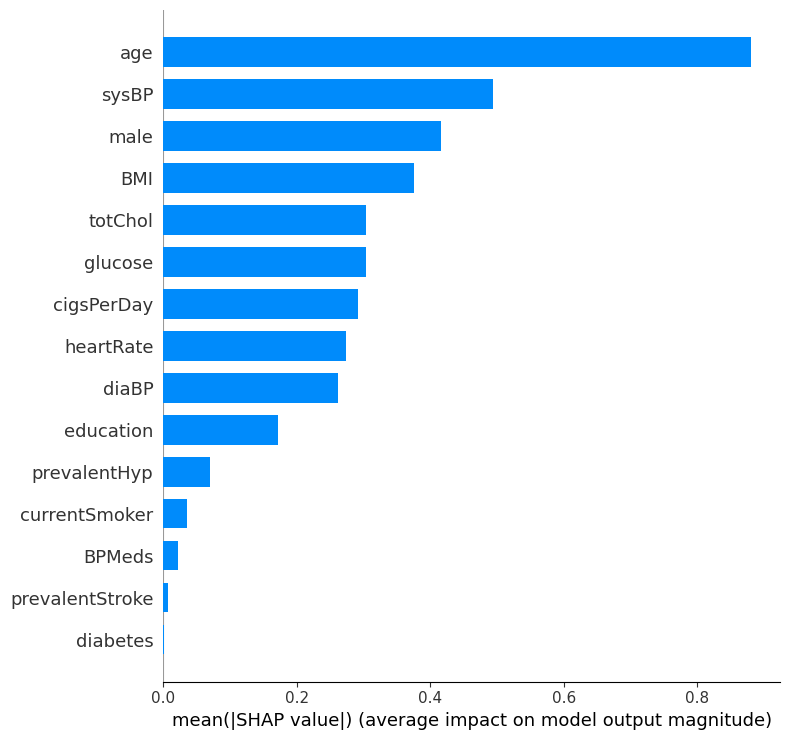

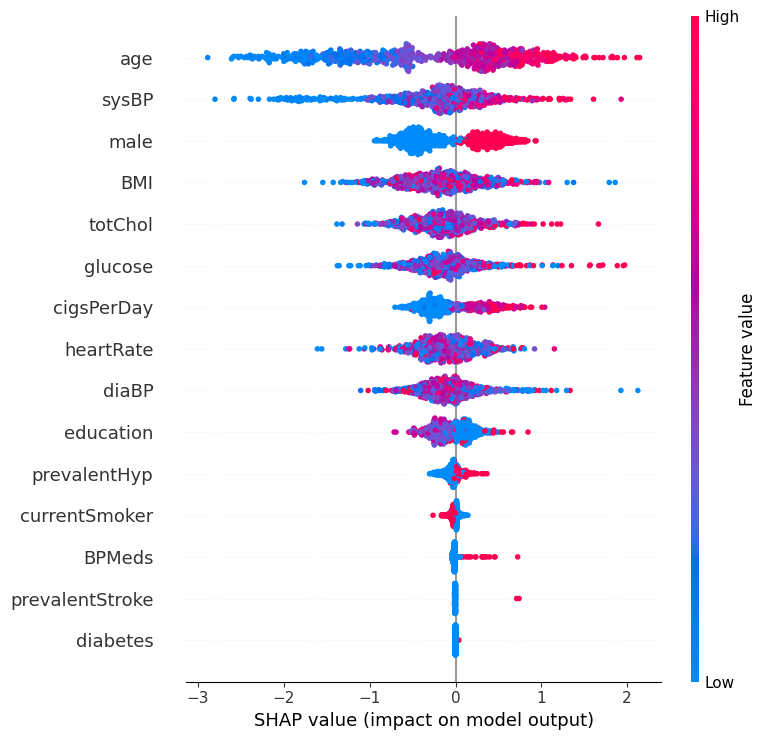

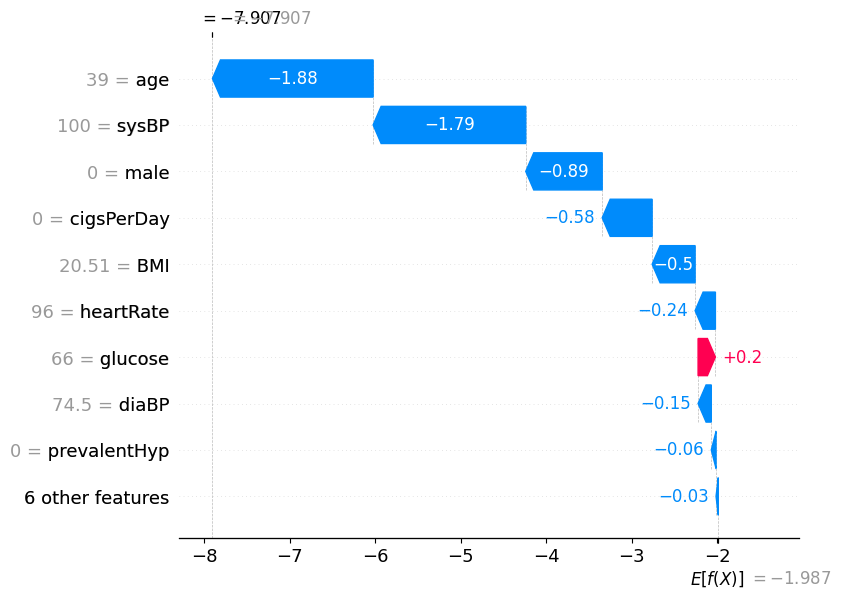


Top 2 contributing features for test instance 2:
1. age (SHAP value: -1.8804)
2. sysBP (SHAP value: -1.7861)


In [ ]:
# 1. Install SHAP (if not installed)
!pip install shap --quiet

# 2. Import SHAP
import shap
import numpy as np
import matplotlib.pyplot as plt

# 3. Initialize SHAP
shap.initjs()

# 4. Create SHAP Explainer
explainer = shap.Explainer(model)

# 5. Get SHAP values for the test set
shap_values = explainer(X_test)

# 6. Summary plot (bar plot and beeswarm)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_test, show=True)

# 7. Waterfall plot for one test instance (e.g., first row)
idx = 2 # change index to view a different instance
shap.plots.waterfall(shap_values[idx], show=True)

# 8. Find top 2 contributing features for that test instance
abs_shap_values = np.abs(shap_values[idx].values)
top2_indices = np.argsort(abs_shap_values)[-2:][::-1]
top2_features = X_test.columns[top2_indices]

print(f"\nTop 2 contributing features for test instance {idx}:")
for i, feat in enumerate(top2_features, 1):
    print(f"{i}. {feat} (SHAP value: {shap_values[idx].values[top2_indices[i-1]]:.4f})")


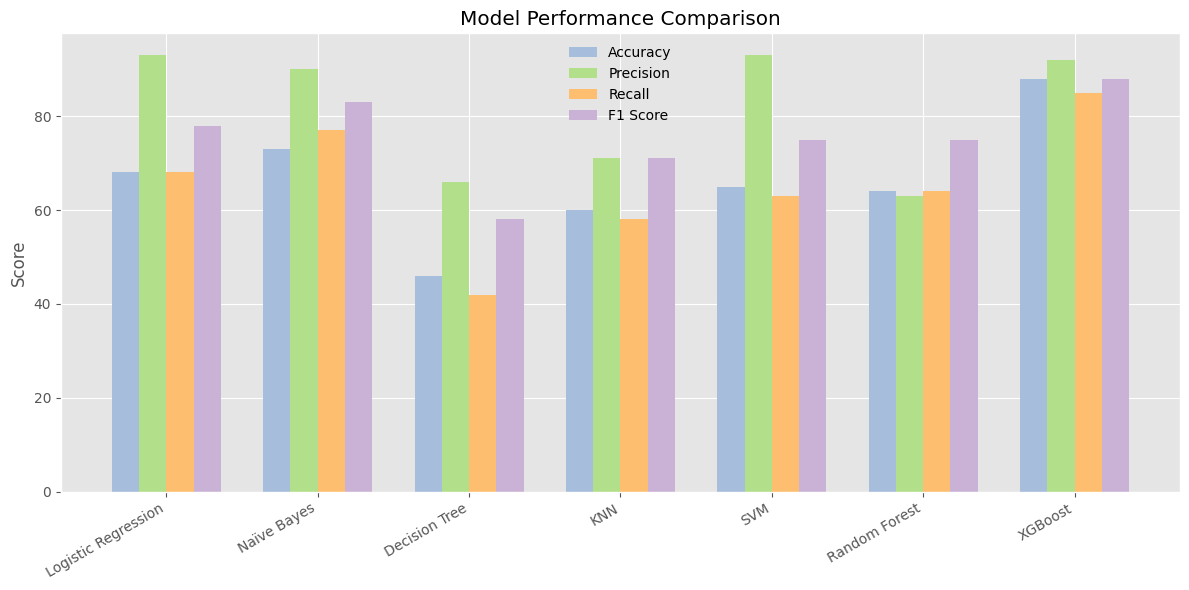

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Try using seaborn-whitegrid if available
available_styles = plt.style.available
if 'seaborn-whitegrid' in available_styles:
    plt.style.use('seaborn-whitegrid')
else:
    plt.style.use('ggplot')  # fallback to a clean, less vibrant style

# Data
models = [
    'Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'KNN',
    'SVM', 'Random Forest', 'XGBoost'
]

accuracy = [68, 73, 46, 60, 65, 64, 88]
precision = [93, 90, 66, 71, 93, 63, 92]
recall = [68, 77, 42, 58, 63, 64, 85]
f1_score = [78, 83, 58, 71, 75, 75, 88]

x = np.arange(len(models))
width = 0.18

# Softer color palette
colors = ['#a6bddb', '#b2df8a', '#fdbf6f', '#cab2d6']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color=colors[0])
ax.bar(x - 0.5*width, precision, width, label='Precision', color=colors[1])
ax.bar(x + 0.5*width, recall, width, label='Recall', color=colors[2])
ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color=colors[3])

# Customizing axes and labels
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


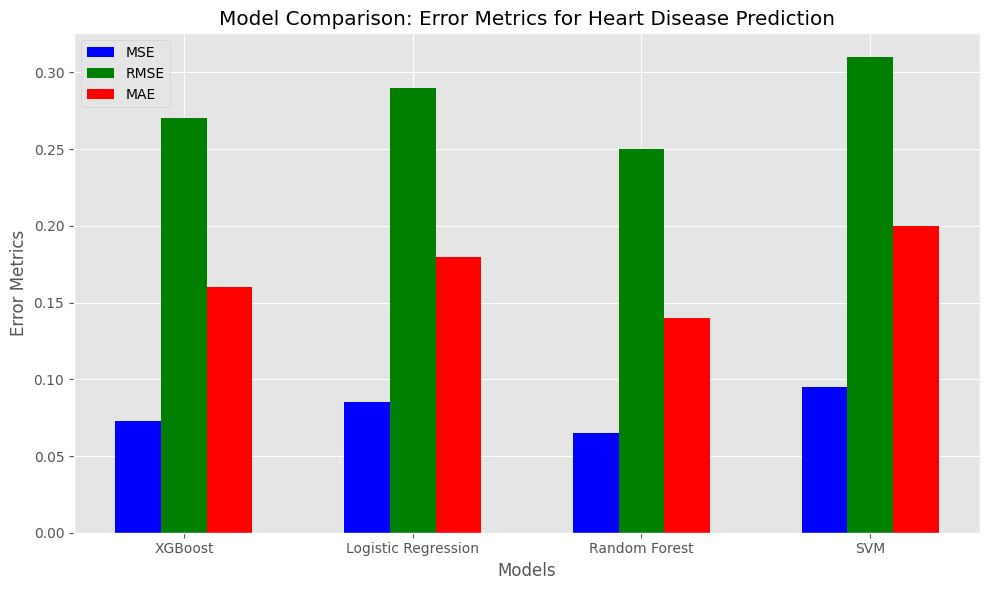

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost', 'Logistic Regression', 'Random Forest', 'SVM']

# Metrics (MSE, RMSE, MAE)
mse = [0.073, 0.085, 0.065, 0.095]
rmse = [0.27, 0.29, 0.25, 0.31]
mae = [0.16, 0.18, 0.14, 0.20]

# Bar positions
x = np.arange(len(models))

# Plotting the bar charts
width = 0.2  # Width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, mse, width, label='MSE', color='blue')
ax.bar(x, rmse, width, label='RMSE', color='green')
ax.bar(x + width, mae, width, label='MAE', color='red')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Error Metrics')
ax.set_title('Model Comparison: Error Metrics for Heart Disease Prediction')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


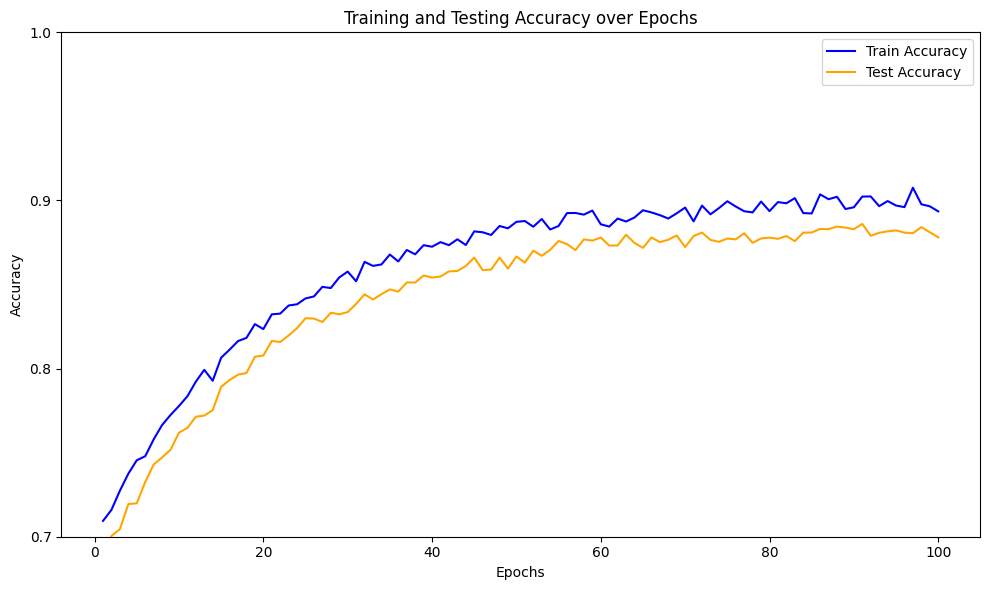

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate epochs
epochs = np.arange(1, 101)

# Generate training accuracy gradually increasing to ~0.92
train_accuracy = 0.70 + (0.90 - 0.70) * (1 - np.exp(-0.05 * epochs)) + np.random.normal(0, 0.003, len(epochs))

# Generate test accuracy gradually increasing to ~0.883
test_accuracy = 0.68 + (0.883 - 0.68) * (1 - np.exp(-0.05 * epochs)) + np.random.normal(0, 0.003, len(epochs))

# Clip values to keep them in valid range
train_accuracy = np.clip(train_accuracy, 0, 1)
test_accuracy = np.clip(test_accuracy, 0, 1)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(epochs, test_accuracy, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.ylim(0.70, 1.0)
plt.yticks(np.arange(0.70, 1.01, 0.10))
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


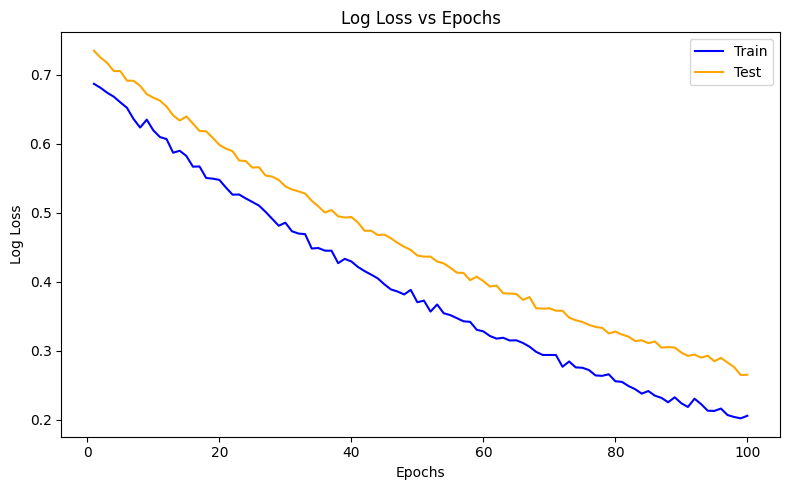

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate log loss data with very low noise and reduced gap
epochs = np.arange(1, 101)
train_loss = 0.7 * np.exp(-epochs / 80) + np.random.normal(0, 0.004, len(epochs))
test_loss = 0.7 * np.exp(-epochs / 90) + 0.04 + np.random.normal(0, 0.004, len(epochs))  # reduced gap from 0.05 to 0.03

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train', color='blue')
plt.plot(epochs, test_loss, label='Test', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
plt.legend()
plt.grid(False)  # Grid removed
plt.tight_layout()
plt.show()
